In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# -----------warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
for i in df.columns:
    uni_val = df[i].unique()
    print(f"{i}:\n {uni_val}\n")

step:
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

### Data cleaning

Dataset is already cleaned.

### Missing values

There is no missing value in the given dataset

### Checking outliers 

In [7]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
Box_plot= ['step','amount','oldbalanceOrg', 'newbalanceOrig',
          'oldbalanceDest', 'newbalanceDest']

In [10]:
for c in Box_plot:  
    percentile25=df[c].quantile(0.25)
    percentile75=df[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    print(c,':',df.shape[0]-(df[(df[c]<=upper_limit) & (df[c]>=lower_limit)].shape[0]))

step : 102688
amount : 338078
oldbalanceOrg : 1112507
newbalanceOrig : 1053391
oldbalanceDest : 786135
newbalanceDest : 738527


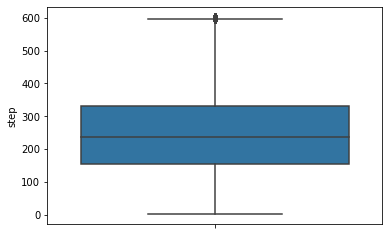

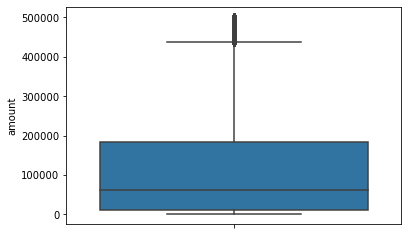

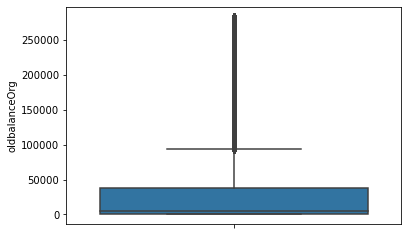

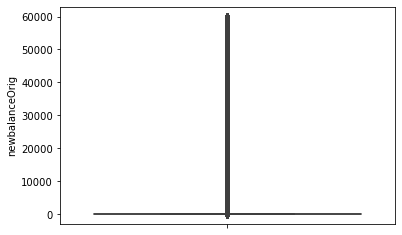

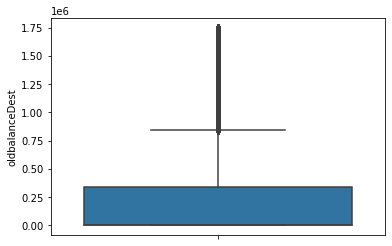

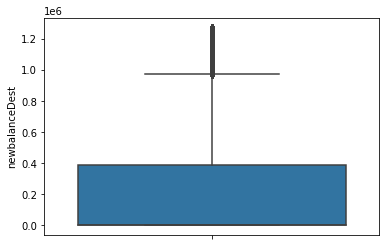

In [11]:
for c in Box_plot:
  percentile25 = df[c].quantile(0.25)
  percentile75 = df[c].quantile(0.75)
  IQR = percentile75 - percentile25
  Upperlimit = percentile75 + 1.5*IQR
  Lowerlimit = percentile25 - 1.5*IQR
  df= df[df[c]<=Upperlimit]
  df = df[df[c]>=Lowerlimit]
  plt.figure()
  sns.boxplot(y=c, data =df)

In [12]:
df.drop("isFlaggedFraud", axis=1, inplace = True)

In [13]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6259915,602,CASH_OUT,274125.77,C1814867638,274125.77,0.00,C67323389,0.00,274125.77,1
6259916,602,TRANSFER,232185.56,C1693098811,232185.56,0.00,C1196187420,0.00,0.00,1
6259924,603,TRANSFER,39247.74,C1777586207,39247.74,0.00,C1509442679,0.00,0.00,1
6259930,603,TRANSFER,158879.10,C1226871955,158879.10,0.00,C1363273657,0.00,0.00,1


### Checking Multi-Collinearity

In [14]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.016625,-0.000258,-0.000614,-0.011018,-0.019200,0.010469
amount,-0.016625,1.000000,0.222135,-0.242911,0.391904,0.652010,0.006549
oldbalanceOrg,-0.000258,0.222135,1.000000,0.401542,-0.027136,0.052919,0.080404
newbalanceOrig,-0.000614,-0.242911,0.401542,1.000000,-0.142891,-0.199965,-0.011235
oldbalanceDest,-0.011018,0.391904,-0.027136,-0.142891,1.000000,0.938212,-0.006107
newbalanceDest,-0.019200,0.652010,0.052919,-0.199965,0.938212,1.000000,-0.007142
isFraud,0.010469,0.006549,0.080404,-0.011235,-0.006107,-0.007142,1.000000


From this correlation we can easily observe that "newbalanceDest" and "oldbalanceDest" have strong relation approx(93%)
between each other. So, In that case we remove any one of the column. that's why we reomve "oldbalanceDest" column from 
the given dataset.

In [15]:
df.drop("oldbalanceDest", axis = 1,  inplace = True)

In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,newbalanceDest,isFraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0


For Making suitable model removing all the unrelated column columns 

In [17]:
df.drop(["nameOrig","nameDest"], axis=1, inplace = True)

A machine learning model known as fraud detection is utilized to identify fraudulent transactions or activities by detecting uncommon patterns or anomalies that could suggest fraudulent behavior in a dataset. This model is trained on past data consisting of both fraudulent and legitimate transactions to recognize patterns and characteristics that differentiate between fraudulent and genuine transactions.

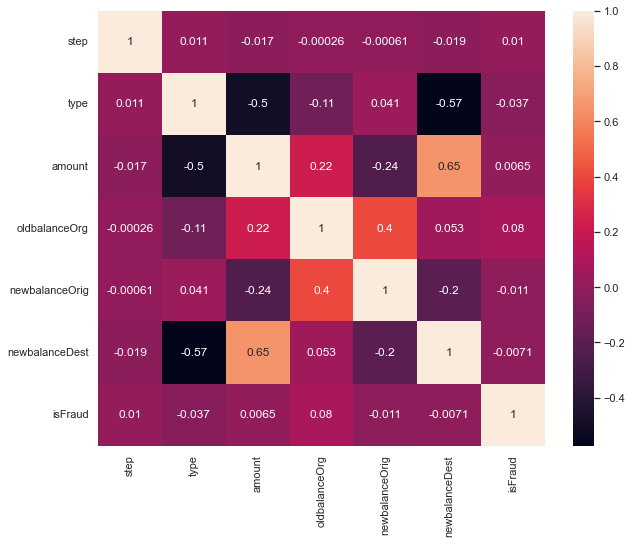

In [30]:
sns.heatmap(df.corr(),annot = True)
sns.set(rc={'figure.figsize':(20,15)})

In [19]:
df.head(1)

,step,type,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,isFraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0


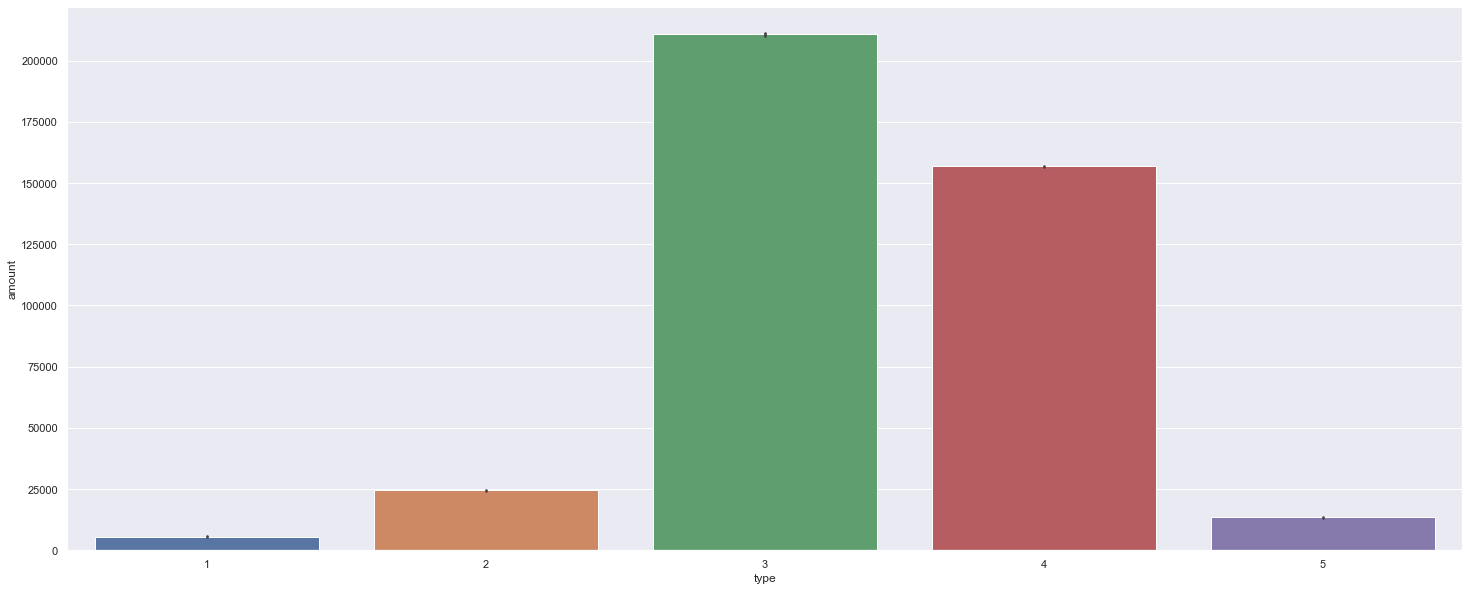

In [32]:
sns.barplot(x="type", y="amount", data=df)
sns.set(rc={'figure.figsize':(20,10)})

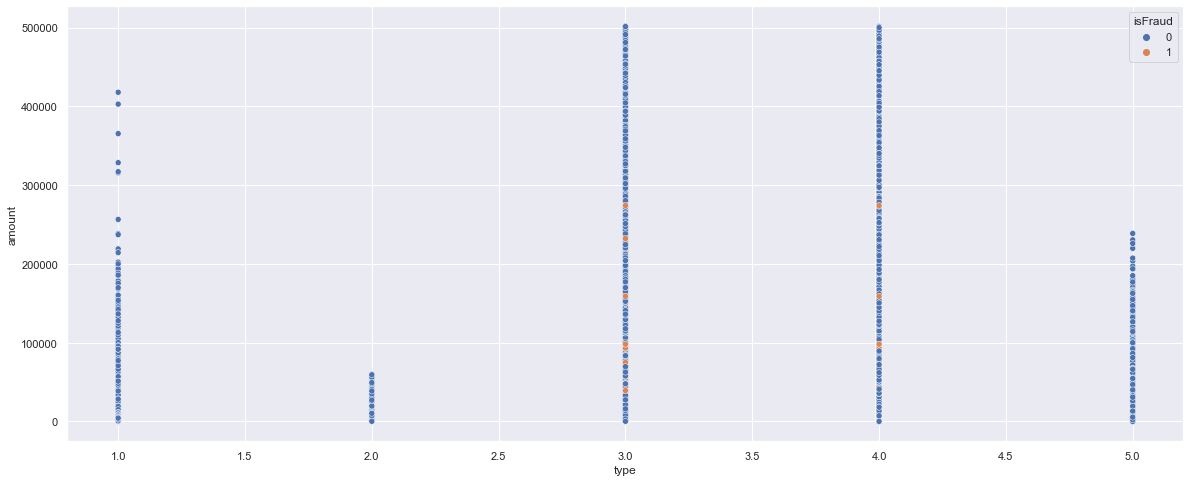

In [29]:
sns.scatterplot(x='type', y='amount', hue='isFraud', data=df)
sns.set(rc={'figure.figsize':(10,8)})

### Ordinal Encoding 

In [22]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,isFraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0


In [23]:
df["type"].value_counts()

PAYMENT     1629609
CASH_OUT    1351509
TRANSFER     151476
CASH_IN       44613
DEBIT         22085
Name: type, dtype: int64

In [24]:
map_type = {'PAYMENT': 5, 'CASH_OUT': 4, 'TRANSFER': 3, 'CASH_IN': 2, 'DEBIT': 1}

In [25]:
df["type"]=df["type"].map(map_type)

In [26]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,isFraud
1,1,5,1864.28,21249.00,19384.72,0.00,0
2,1,3,181.00,181.00,0.00,0.00,1
3,1,4,181.00,181.00,0.00,0.00,1
4,1,5,11668.14,41554.00,29885.86,0.00,0
5,1,5,7817.71,53860.00,46042.29,0.00,0
...,...,...,...,...,...,...,...
6259915,602,4,274125.77,274125.77,0.00,274125.77,1
6259916,602,3,232185.56,232185.56,0.00,0.00,1
6259924,603,3,39247.74,39247.74,0.00,0.00,1
6259930,603,3,158879.10,158879.10,0.00,0.00,1


## Logistic Regression

In [33]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [34]:
x=df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'newbalanceDest']].values

In [37]:
y=df['isFraud'].values

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=15)

In [86]:
x_train

array([[1.70000000e+01, 4.00000000e+00, 4.33859200e+04, 0.00000000e+00,
        0.00000000e+00, 5.12823800e+05],
       [1.20000000e+01, 5.00000000e+00, 2.83228000e+03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.60000000e+01, 5.00000000e+00, 2.50850500e+04, 1.04330000e+04,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [1.56000000e+02, 4.00000000e+00, 1.47970900e+05, 1.29433300e+05,
        0.00000000e+00, 1.11510842e+06],
       [4.30000000e+01, 4.00000000e+00, 1.50491270e+05, 1.19825200e+04,
        0.00000000e+00, 4.45775440e+05],
       [1.56000000e+02, 5.00000000e+00, 2.41150000e+03, 1.74930000e+04,
        1.50815000e+04, 0.00000000e+00]])

In [87]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [89]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [90]:
classifier.fit(x_train, y_train)

LogisticRegression()

In [91]:
y_pred=classifier.predict(x_test)

In [92]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Evaluation Metrics

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[639353,     31],
       [   352,    123]], dtype=int64)

In [94]:
tn,fp,fn,tp=confusion_matrix(y_test, y_pred).ravel()

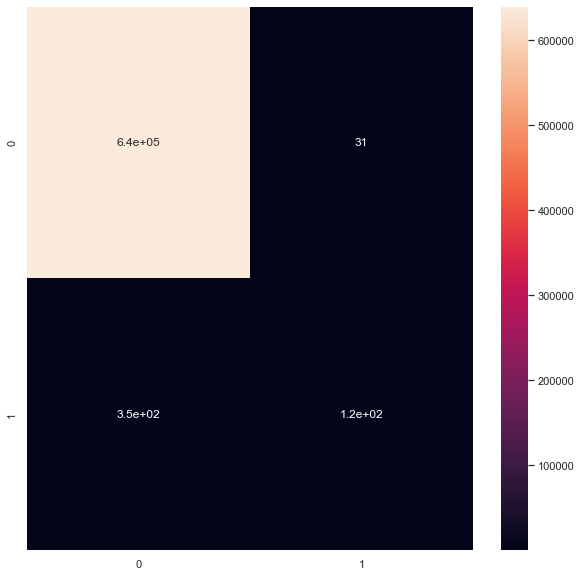

In [101]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
sns.set(rc={'figure.figsize':(15,15)})

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9994014306276852

In [97]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6294494421275214

In [102]:
y_pred1=classifier.predict(x_train)

In [103]:
accuracy_score(y_train, y_pred1)

0.9993588423686027

The statement implies that the model is accurately categorizing 99% of transactions as either genuine or fraudulent, which is a significant level of precision. This suggests that the model is proficient in identifying fraudulent behavior.